In [34]:
from atproto import Client
from datetime import datetime
import re
!pip install pandas
import pandas as pd
!pip install matplotlib
import matplotlib.pyplot as plt


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [35]:
BLUESKY_HANDLE = "socialweb-project.bsky.social"      # e.g. "christina123.bsky.social"
BLUESKY_APP_PASSWORD = "qfdm-t2h6-dhbm-4l2b"   # the one you just created

In [36]:
ELECTION_YEAR = 2025

In [37]:
female_politicians = [
    "Fatihya Abdi", "Elles van Ark", "Etkin Armut", "Bente Becker",
    "Sandra Beckerman", "Fatimazhra Belhirch", "Nathalie van Berkel",
    "Anouschka Biekman", "Mirjam Bikker", "Lucienne Boelsma-Hoekstra",
    "Corrie van Brenk", "Laura Bromet", "Judith Buhler",
    "Ingrid Coenradie", "Heera Dijk", "Inge van Dijk",
    "Sarah Dobbe", "Wendy van Eijk", "Sarah El Boujdaini",
    "Renate den Hollander", "Tamara ten Hove", "Renilde Huizenga",
    "Barbara Kathmann", "Mona Keijzer", "Ines Kostic",
    "Suzanne Kroger", "Esmah Lahlah", "Annelotte Lammers",
    "Vicky Maeijer", "Claire Martens-America", "Rachel van Meetelen",
    "Ingrid Michon-Derkzen", "Nicole Moinat", "Marjolein Moorman",
    "Songul Mutluer", "Annabel Nanninga", "Sjoukje van Oosterhout",
    "Ouafa Oualhadj", "Esther Ouwehand", "Mariette Patijn",
    "Wieke Paulusma", "Kati Piri", "Caroline van der Plas",
    "Anne-Marijke Podt", "Annette Raijer", "Queeny Rajkowski",
    "Ilana Rooderkerk", "Shanna Schilder", "Hanneke Steen",
    "Jeltje Straatman", "Marijke Synhaeve", "Christine Teunissen",
    "Eveline Tijmstra", "Mikal Tseggai",
    "Marieke Vellinga-Beemsterboer", "Lisa Vliegenthart",
    "Marina Vondeling", "Lidewij de Vos", "Hilde Wendel",
    "Hanneke van der Werf", "Lisa Westerveld", "Femke Wiersma",
    "Dilan Yesilgoz-Zegerius", "Ani Zalinyan", "Jantine Zwinkels"
]



male_pols = ["Thierry Aartsen", "Ismail el Abassi", "Robert van Asten", "Stephan van Baarle", "Mpanzu Bamenga", "Thierry Baudet", "Daniel van den Berg", "Harry Bevers", "Henri Botenbal", "Diederik Boomsma", "Maikel Boon", "Martin Bosma", "Derk Boswijk", "Ruben Brekelmans", "Tijs van den Brink", "Bart van den Brink", "Eric van der Burg", "Julian Bushoff", "Thom van Campen", "Don Ceder", "Simon Ceulemans", "Rene Claassen", "Ranjith Clemminck", "Laurens Dassen", "Ralk Dekker", "Tony van Dijck", "Jimmy Dijk", "Emiel van Dijk", "Diederik van Dijk", "Peter van Duijvenvoorde", "Joost Eerdmans", "Ulysse Ellian", "Dogukan Ergin", "Silvio Erkens", "Marjolein Faber", "Andre Flach", "Maarten Goudzwaard", "Dion Graus", "Pieter Grinwis", "Peter de Groot", "Sarath Hamstra", "Eelco Heinen", "Hidde Heutink", "Michiel Hoogeveen", "Habtamu de Hoop", "Pepijn van Houwelingen", "Dion Huidekooper", "Frederik Jansen", "Chris Jansen", "Rob Jetten", "Henk Jumelet", "Vincent Karremans", "Arend Kisteman", "Jesse Klaver", "Felix Klos", "Jan Arie Koorevaar", "Alexander Kops", "Daan de Kort", "Ulas Kose", "Harmen Krul", "Maes van Lanschot", "Tom van der Lee", "Gidi Markuszower", "Gideon van Meijeren", "Mohammed Mohandis", "Jeremy Mooiman", "Edgar Mulder", "Stephen Neijenhuis", "Jurgen Nobel", "Henk-Jan Oosterhuis", "Jan Paternotte", "Erwin Prickaertz", "Raymond de Roon", "Jan Schoonis", "Bjorn Schutz", "Joost Sneller", "Chris Stoffer", "Sebastiaan Stoteler", "Jan Struijs", "Luc Stultiens", "Henk Vermeer", "Marc Vervuurt", "Hans Vijlbrief", "Elmar Vlottes", "Geert Wilders"]

print(f"Configuration loaded. Searching for {len(female_politicians)} female politicians in {ELECTION_YEAR}.")
print(f"Later we will look into male politicians and compare with female. Males are {len(male_pols)}")

Configuration loaded. Searching for 65 female politicians in 2025.
Later we will look into male politicians and compare with female. Males are 85


In [38]:
client = Client()
client.login(BLUESKY_HANDLE, BLUESKY_APP_PASSWORD)
print(f"Connected to Bluesky as: {client.me.handle}")

Connected to Bluesky as: socialweb-project.bsky.social


In [39]:
name_posts = []

# Page 1
for name in female_politicians:
    print("Searching for ", name)
    
    cursor = None
    page_count = 0
    
    while True:
        # Search with pagination
        params = {'q': name, 'limit': 100}
        if cursor:
            params['cursor'] = cursor
        
        try:
            results = client.app.bsky.feed.search_posts(params=params)
        except Exception as e:
            print(f"Error: {e}")
            break
        
        posts = results.posts if hasattr(results, 'posts') else []
        
        if page_count == 0:
            print("First page returned", len(posts), "posts")
        else:
            print("Next page returned", len(posts), "posts")
        
        # Check if we have posts
        if not posts:
            break
        
        # Process posts from this page
        for post in posts:
            text = post.record.text if hasattr(post.record, 'text') else ""
            created_at = post.record.created_at if hasattr(post.record, 'created_at') else ""
            
            try:
                timestamp = datetime.fromisoformat(created_at.replace('Z', '+00:00'))
                
                if timestamp.year == 2025:
                    name_posts.append({
                        "text": text,
                        "politician": name,
                        "hate_speech": False,
                        "hate_categories": []
                    })
            except:
                continue
        
        # Check for next page
        cursor = results.cursor if hasattr(results, 'cursor') else None
        if not cursor:
            break
        
        page_count += 1
        
        # Check if we've gone past 2025
        if posts:
            try:
                last_timestamp = datetime.fromisoformat(posts[-1].record.created_at.replace('Z', '+00:00'))
                if last_timestamp.year < 2025:
                    break
            except:
                pass

print(f"\nTotal posts collected: {len(name_posts)}")

Searching for  Fatihya Abdi
First page returned 30 posts
Searching for  Elles van Ark
First page returned 2 posts
Searching for  Etkin Armut
First page returned 5 posts
Searching for  Bente Becker
First page returned 100 posts
Next page returned 98 posts
Next page returned 98 posts
Next page returned 97 posts
Next page returned 99 posts
Next page returned 97 posts
Searching for  Sandra Beckerman
First page returned 98 posts
Next page returned 100 posts
Searching for  Fatimazhra Belhirch
First page returned 37 posts
Searching for  Nathalie van Berkel
First page returned 35 posts
Searching for  Anouschka Biekman
First page returned 18 posts
Searching for  Mirjam Bikker
First page returned 100 posts
Next page returned 100 posts
Next page returned 98 posts
Next page returned 98 posts
Next page returned 99 posts
Next page returned 97 posts
Next page returned 99 posts
Searching for  Lucienne Boelsma-Hoekstra
First page returned 3 posts
Searching for  Corrie van Brenk
First page returned 9 po

In [40]:

hate_keywords = {
    'sexist': [
        # English
        'bitch', 'slut', 'whore', 'feminazi', 'should be home', 'kitchen', 
        'belong in kitchen', 'stay home', 'not fit for', 'too emotional',
        'hormonal', 'on her period', 'typical woman', 'like all women',
        'gold digger', 'sleeping her way', 'token woman', 'diversity hire',
        # Dutch
        'hoer', 'slet', 'teef', 'wijf', 'kutwijf', 'trut', 'tuthola',
        'blijf thuis', 'thuishoren', 'keuken', 'niet geschikt',
        'typisch vrouw', 'als alle vrouwen', 'emancipatiehoer'
    ],
    
    'appearance': [
        # English
        'ugly', 'fat', 'old', 'haggard', 'looks like', 'hideous', 'disgusting',
        'needs makeup', 'aging', 'wrinkled', 'unattractive', 'gross', 'obese',
        'pig', 'cow', 'dog', 'horse face', 'too old', 'past her prime',
        'should dress better', 'unfuckable', 'butter face',
        # Dutch
        'lelijk', 'dik', 'oud', 'afgetakeld', 'ziet eruit als', 'goor',
        'walgelijk', 'smerig', 'varken', 'koe', 'hond', 'te oud', 
        'ouwe taart', 'opgespoten', 'plastisch'
    ],
    
    'threats': [
        # English
        'kill', 'rape', 'assault', 'death threat', 'should die', 'hope you die',
        'deserve to die', 'hang', 'shoot', 'stab', 'murder', 'assassinate',
        'violence', 'hurt', 'beat', 'attack', 'lynch', 'burn',
        'going to get', 'coming for you', 'watch your back', 'better watch out',
        # Dutch
        'dood', 'verkracht', 'vermoord', 'doodgeschoten', 'opgehangen',
        'gestoken', 'aanval', 'geweld', 'pijn doen', 'slaan', 'pak op je',
        'krijg je', 'komt ervan', 'kijk maar uit', 'pas maar op'
    ],
    
    'misogyny': [
        # English
        'stupid woman', 'dumb female', 'emotional', 'hysterical', 'irrational',
        'cant think', 'no brain', 'empty head', 'airhead', 'bimbo', 'ditzy',
        'woman logic', 'female brain', 'overly sensitive', 'dramatic',
        'attention seeker', 'attention whore', 'playing victim', 'victim card',
        'women are', 'females are', 'all women', 'typical female',
        # Dutch
        'domme vrouw', 'stomme wijf', 'emotioneel', 'hysterisch', 'irrationeel',
        'geen hersens', 'leeg hoofd', 'dom blondje', 'vrouwenlogica',
        'typisch vrouwelijk', 'aandachtshoer', 'slachtoffer spelen',
        'vrouwen zijn', 'alle vrouwen', 'wijven zijn'
    ],
    
    'objectification': [
        # English
        'hot', 'sexy', 'body', 'breasts', 'legs', 'ass', 'boobs', 'tits',
        'would bang', 'would smash', 'milf', 'piece of ass', 'nice rack',
        'fuckable', 'bangable', 'doable', 'eye candy', 'arm candy',
        'prostitute', 'escort', 'stripper', 'pornstar',
        # Dutch
        'lekker', 'geil', 'lichaam', 'borsten', 'tieten', 'kont', 'benen',
        'neuken', 'pikken', 'pijpen', 'hoer', 'prostituee', 'slet',
        'hoerig', 'sletterig', 'goedkoop'
    ],
    
    'competence_undermining': [
        # English
        'unqualified', 'incompetent', 'clueless', 'has no idea', 'doesnt know',
        'out of her depth', 'in over her head', 'puppet', 'controlled by',
        'token', 'quota', 'affirmative action', 'only there because',
        'diversity', 'check box', 'not earned', 'handed to her',
        # Dutch
        'onbekwaam', 'incompetent', 'geen idee', 'weet niet', 'snapt niet',
        'marionet', 'pop', 'aangestuurd door', 'quotum', 'alleen maar omdat',
        'diversiteit', 'niet verdiend', 'cadeau gekregen'
    ],
    
    'dismissive': [
        # English
        'shut up', 'nobody cares', 'who cares', 'go away', 'disappear',
        'resign', 'step down', 'quit', 'get out', 'fuck off', 'piss off',
        'go back to', 'return to', 'not welcome', 'dont belong',
        # Dutch
        'kop dicht', 'hou je bek', 'bek houden', 'niemand interesseert',
        'boeit niet', 'rot op', 'oprotten', 'wegwezen', 'ga weg',
        'opzouten', 'opdonderen', 'aftreden', 'opstappen', 'ga terug naar',
        'niet welkom', 'hoort hier niet'
    ],
    
    'ethnic_religious_slurs': [
        # English (relevant to Dutch political context)
        'muslim', 'immigrant', 'foreign', 'terrorist', 'go back', 'not dutch',
        'invasion', 'replacement', 'traitor', 'islam lover', 'multiculti',
        # Dutch
        'moslim', 'allochtoon', 'buitenlander', 'terrorist', 'ga terug',
        'niet nederlands', 'invasie', 'vervanging', 'landverraad', 'verrader',
        'islamliefhebber', 'gutmensch', 'linkse rat'
    ]
}
for post in name_posts:
    text_lower = post["text"].lower()
    post['hate_speech'] = False
    post['hate_categories'] = []

    for category, keywords in hate_keywords.items():
        for kw in keywords:
            kw_escaped = re.escape(kw)
            pattern = r'\b' + kw_escaped + r'\b'

            if re.search(pattern, text_lower):
                post['hate_speech'] = True
                post['hate_categories'].append(category)
                break


total = len(name_posts)
hate_count = len([p for p in name_posts if p['hate_speech']])

print(f"Total posts: {total}")
print(f"Posts with potential hate speech: {hate_count} ({hate_count/total*100:.1f}%)")
print(f"\nBreakdown by category:")

for category in hate_keywords.keys():
    count = len([p for p in name_posts if category in p.get('hate_categories', [])])
    print(f"  - {category}: {count}")


Total posts: 17947
Posts with potential hate speech: 980 (5.5%)

Breakdown by category:
  - sexist: 77
  - appearance: 227
  - threats: 364
  - misogyny: 21
  - objectification: 145
  - competence_undermining: 94
  - dismissive: 50
  - ethnic_religious_slurs: 40


In [42]:
from collections import Counter

# How many posts per politician?
counts = Counter(p["politician"] for p in malepol_posts)
print(counts)

# Check any key that contains "Geert"
for k in counts:
    if "Geert" in k:
        print("Found key for Geert:", repr(k), "with", counts[k], "posts")

Counter({'Geert\xa0Wilders': 6858, 'Rob Jetten': 4815, 'Joost Eerdmans': 2261, 'Marjolein Faber': 2092, 'Henk Vermeer': 1960, 'Jesse Klaver': 1438, 'Jimmy Dijk': 1353, 'Martin Bosma': 1109, 'Thierry Baudet': 945, 'Ruben Brekelmans': 930, 'Eric van der Burg': 726, 'Tijs van den Brink': 671, 'Laurens Dassen': 584, 'Diederik Boomsma': 565, 'Eelco Heinen': 561, 'Chris Stoffer': 487, 'Don Ceder': 458, 'Vincent Karremans': 453, 'Thom van Campen': 446, 'Dion Graus': 345, 'Stephan van Baarle': 331, 'Jan Paternotte': 282, 'Diederik van Dijk': 274, 'Habtamu de Hoop': 270, 'Derk Boswijk': 268, 'Hans Vijlbrief': 259, 'Chris Jansen': 243, 'Maikel Boon': 224, 'Tom van der Lee': 215, 'Gideon van Meijeren': 215, 'Peter de Groot': 213, 'Thierry Aartsen': 196, 'Jurgen Nobel': 167, 'Pieter Grinwis': 161, 'Ulysse Ellian': 145, 'Ismail el Abassi': 124, 'Gidi Markuszower': 123, 'Andre Flach': 120, 'Joost Sneller': 118, 'Emiel van Dijk': 117, 'Pepijn van Houwelingen': 114, 'Mpanzu Bamenga': 109, 'Jan Struijs

In [41]:
malepol_posts = []

# Page 1
for name in male_pols:
    print("Searching for ", name)
    
    cursor = None
    page_count = 0
    
    while True:
        # Search with pagination
        params = {'q': name, 'limit': 100}
        if cursor:
            params['cursor'] = cursor
        
        try:
            results = client.app.bsky.feed.search_posts(params=params)
        except Exception as e:
            print(f"Error: {e}")
            break
        
        posts = results.posts if hasattr(results, 'posts') else []
        
        if page_count == 0:
            print("First page returned", len(posts), "posts")
        else:
            print("Next page returned", len(posts), "posts")
        
        # Check if we have posts
        if not posts:
            break
        
        # Process posts from this page
        for post in posts:
            text = post.record.text if hasattr(post.record, 'text') else ""
            created_at = post.record.created_at if hasattr(post.record, 'created_at') else ""
            
            try:
                timestamp = datetime.fromisoformat(created_at.replace('Z', '+00:00'))
                
                if timestamp.year == 2025:
                    malepol_posts.append({
                        "text": text,
                        "politician": name,
                        "hate_speech": False,
                        "hate_categories": []
                    })
            except:
                continue
        
        # Check for next page
        cursor = results.cursor if hasattr(results, 'cursor') else None
        if not cursor:
            break
        
        page_count += 1
        
        # Check if we've gone past 2025
        if posts:
            try:
                last_timestamp = datetime.fromisoformat(posts[-1].record.created_at.replace('Z', '+00:00'))
                if last_timestamp.year < 2025:
                    break
            except:
                pass

print(f"\nTotal posts collected: {len(malepol_posts)}")

Searching for  Thierry Aartsen
First page returned 99 posts
Next page returned 98 posts
Searching for  Ismail el Abassi
First page returned 99 posts
Next page returned 100 posts
Searching for  Robert van Asten
First page returned 16 posts
Searching for  Stephan van Baarle
First page returned 100 posts
Next page returned 98 posts
Next page returned 100 posts
Next page returned 99 posts
Searching for  Mpanzu Bamenga
First page returned 100 posts
Next page returned 55 posts
Searching for  Thierry Baudet
First page returned 99 posts
Next page returned 99 posts
Next page returned 98 posts
Next page returned 100 posts
Next page returned 99 posts
Next page returned 100 posts
Next page returned 98 posts
Next page returned 95 posts
Next page returned 97 posts
Next page returned 97 posts
Searching for  Daniel van den Berg
First page returned 22 posts
Searching for  Harry Bevers
First page returned 17 posts
Searching for  Henri Botenbal
First page returned 0 posts
Searching for  Diederik Boomsma


In [11]:
for post in malepol_posts:
    text_lower = post["text"].lower()
    post['hate_speech'] = False
    post['hate_categories'] = []
    
    for category, keywords in hate_keywords.items():
        for kw in keywords:
            kw_escaped = re.escape(kw)
            pattern = r'\b' + kw_escaped + r'\b'

            if re.search(pattern, text_lower):
                post['hate_speech'] = True
                post['hate_categories'].append(category)
                break


total = len(malepol_posts)
hate_count = len([p for p in malepol_posts if p['hate_speech']])

print(f"Total posts: {total}")
print(f"Posts with potential hate speech: {hate_count} ({hate_count/total*100:.1f}%)")
print(f"\nBreakdown by category:")

for category in hate_keywords.keys():
    count = len([p for p in malepol_posts if category in p.get('hate_categories', [])])
    print(f"  - {category}: {count}")


Total posts: 34365
Posts with potential hate speech: 1779 (5.2%)

Breakdown by category:
  - sexist: 98
  - appearance: 496
  - threats: 498
  - misogyny: 32
  - objectification: 259
  - competence_undermining: 172
  - dismissive: 116
  - ethnic_religious_slurs: 172


In [45]:

# Build filtered list WITHOUT Geert Wilders
minus_wilders = [
    p for p in malepol_posts
    if p["politician"].replace('\xa0', ' ').strip() != "Geert Wilders"
]

total = len(minus_wilders)
hate_count = sum(1 for p in minus_wilders if p['hate_speech'])

print(f"Total posts: {total}")
print(f"Posts with potential hate speech: {hate_count} ({hate_count/total*100:.1f}%)")
print(f"\nBreakdown by category:")

for category in hate_keywords.keys():
    count = sum(1 for p in minus_wilders if category in p.get('hate_categories', []))
    print(f"  - {category}: {count}")

Total posts: 27509
Posts with potential hate speech: 1283 (4.7%)

Breakdown by category:
  - sexist: 88
  - appearance: 378
  - threats: 329
  - misogyny: 27
  - objectification: 205
  - competence_undermining: 145
  - dismissive: 83
  - ethnic_religious_slurs: 69


In [14]:
dataframe = pd.DataFrame(name_posts)

agg = dataframe.groupby("politician").agg(
    total_posts = ("text", "count"),
    hate_posts  = ("hate_speech", "sum")
)

agg["non_hate_posts"] = agg["total_posts"] - agg["hate_posts"]

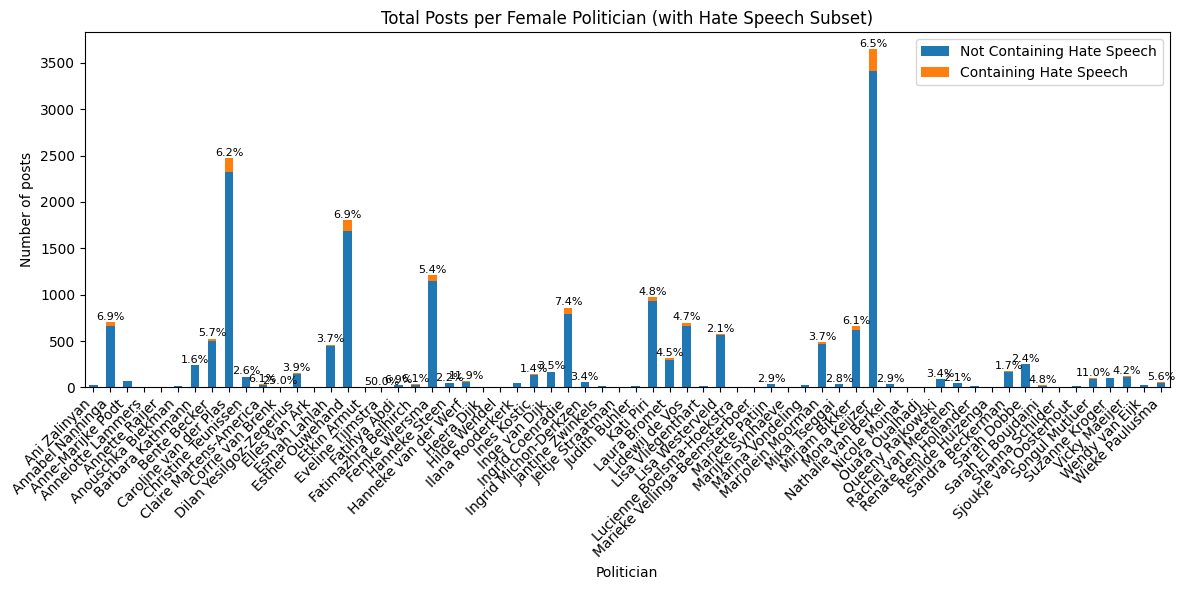

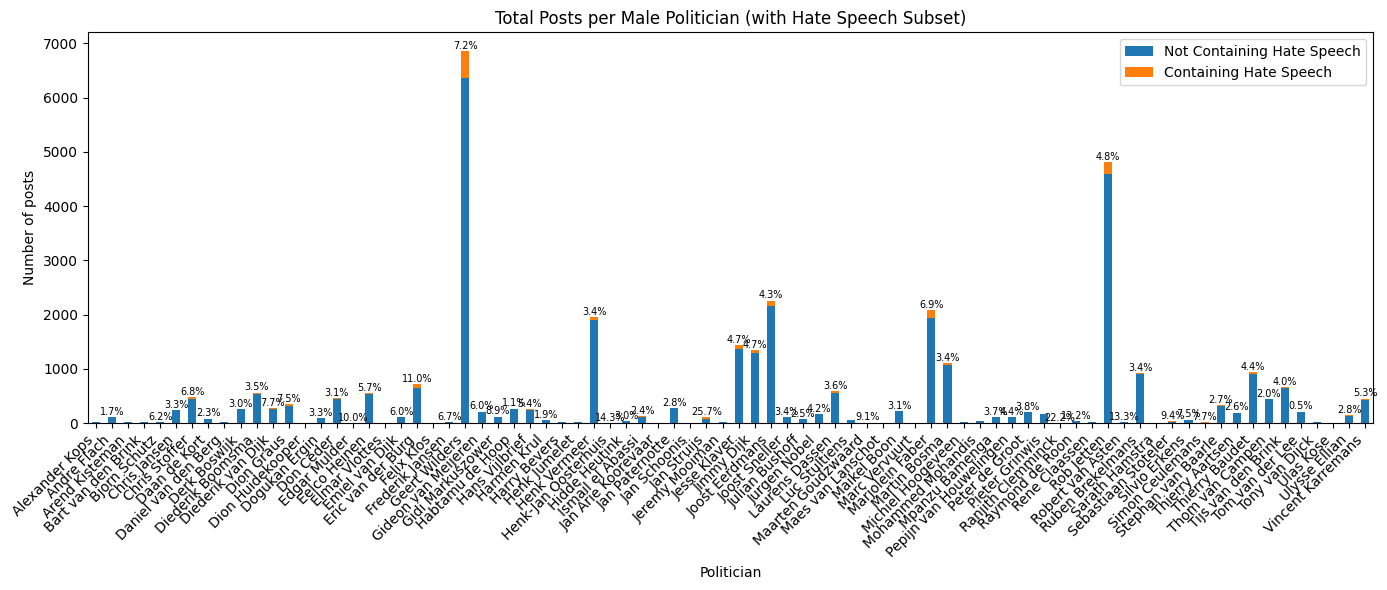

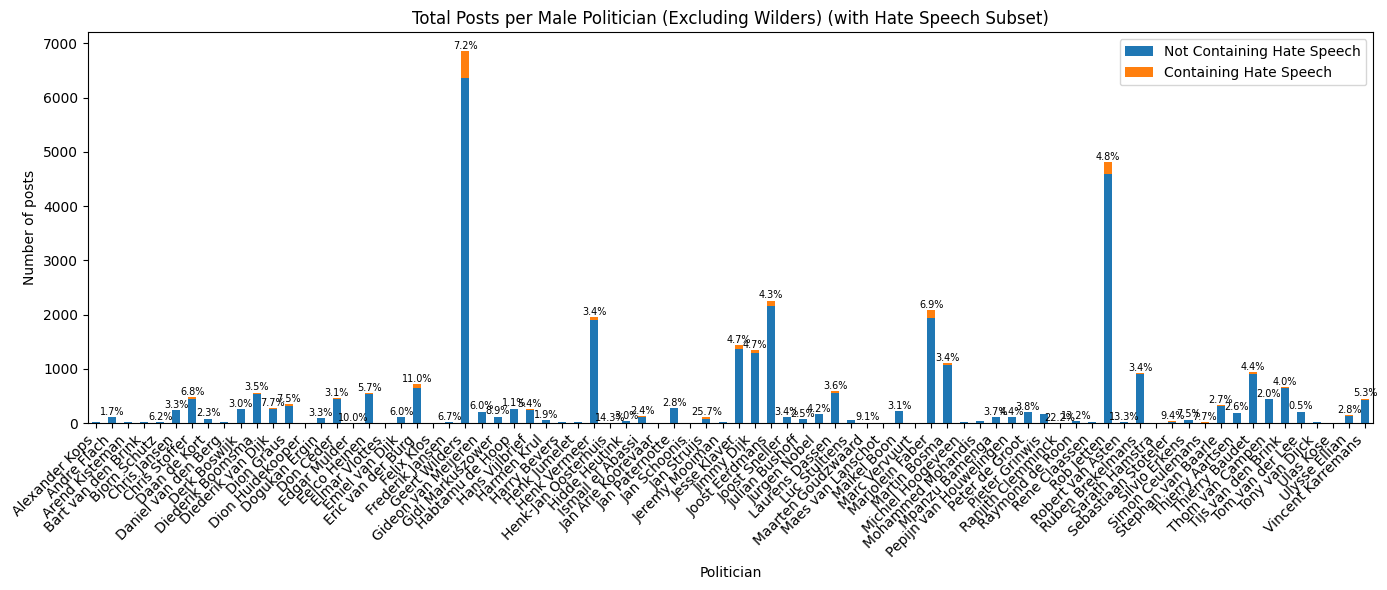

SUMMARY COMPARISON

Female Politicians:
  Total posts: 17935
  Hate speech posts: 980 (5.5%)

Male Politicians:
  Total posts: 34365
  Hate speech posts: 1779 (5.2%)

Male Politicians (excluding Wilders):
  Total posts: 34365
  Hate speech posts: 1779 (5.2%)

Hate speech rate comparison:
  Female politicians: 5.5%
  Male politicians: 5.2%
  Male (excl. Wilders): 5.2%


In [15]:
ax = agg[["non_hate_posts", "hate_posts"]].plot(
    kind="bar",
    stacked=True,
    figsize=(12, 6)
)

ax.legend(["Not Containing Hate Speech", "Containing Hate Speech"])

# Percentage labels above each bar
for i, (non_hate, hate) in enumerate(zip(agg['non_hate_posts'], agg['hate_posts'])):
    total = non_hate + hate
    if total > 0:
        pct = hate / total * 100
        if pct > 0.0:
            ax.text(
                i,
                total + 2,
                f"{pct:.1f}%",
                ha='center', va='bottom', fontsize=8, rotation=0
            )

ax.set_xlabel("Politician")
ax.set_ylabel("Number of posts")
ax.set_title("Total Posts per Female Politician (with Hate Speech Subset)")
plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()

# %%
# Cell 12: Visualize Male Politicians Data
dataframe_male = pd.DataFrame(malepol_posts)

agg_male = dataframe_male.groupby("politician").agg(
    total_posts = ("text", "count"),
    hate_posts  = ("hate_speech", "sum")
)

agg_male["non_hate_posts"] = agg_male["total_posts"] - agg_male["hate_posts"]

ax = agg_male[["non_hate_posts", "hate_posts"]].plot(
    kind="bar",
    stacked=True,
    figsize=(14, 6)
)

ax.legend(["Not Containing Hate Speech", "Containing Hate Speech"])

# Percentage labels above each bar
for i, (non_hate, hate) in enumerate(zip(agg_male['non_hate_posts'], agg_male['hate_posts'])):
    total = non_hate + hate
    if total > 0:
        pct = hate / total * 100
        if pct > 0.0:
            ax.text(
                i,
                total + 2,
                f"{pct:.1f}%",
                ha='center', va='bottom', fontsize=7, rotation=0
            )

ax.set_xlabel("Politician")
ax.set_ylabel("Number of posts")
ax.set_title("Total Posts per Male Politician (with Hate Speech Subset)")
plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()

# %%
# Cell 13: Visualize Male Politicians (Excluding Wilders)
dataframe_minus_wilders = pd.DataFrame(minus_wilders)

agg_minus_wilders = dataframe_minus_wilders.groupby("politician").agg(
    total_posts = ("text", "count"),
    hate_posts  = ("hate_speech", "sum")
)

agg_minus_wilders["non_hate_posts"] = agg_minus_wilders["total_posts"] - agg_minus_wilders["hate_posts"]

ax = agg_minus_wilders[["non_hate_posts", "hate_posts"]].plot(
    kind="bar",
    stacked=True,
    figsize=(14, 6)
)

ax.legend(["Not Containing Hate Speech", "Containing Hate Speech"])

# Percentage labels above each bar
for i, (non_hate, hate) in enumerate(zip(agg_minus_wilders['non_hate_posts'], agg_minus_wilders['hate_posts'])):
    total = non_hate + hate
    if total > 0:
        pct = hate / total * 100
        if pct > 0.0:
            ax.text(
                i,
                total + 2,
                f"{pct:.1f}%",
                ha='center', va='bottom', fontsize=7, rotation=0
            )

ax.set_xlabel("Politician")
ax.set_ylabel("Number of posts")
ax.set_title("Total Posts per Male Politician (Excluding Wilders) (with Hate Speech Subset)")
plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()

# %%
# Cell 14: Summary Statistics Comparison
print("="*60)
print("SUMMARY COMPARISON")
print("="*60)

# Female politicians stats
female_total = len(name_posts)
female_hate = len([p for p in name_posts if p['hate_speech']])
female_pct = (female_hate / female_total * 100) if female_total > 0 else 0

print(f"\nFemale Politicians:")
print(f"  Total posts: {female_total}")
print(f"  Hate speech posts: {female_hate} ({female_pct:.1f}%)")

# Male politicians stats
male_total = len(malepol_posts)
male_hate = len([p for p in malepol_posts if p['hate_speech']])
male_pct = (male_hate / male_total * 100) if male_total > 0 else 0

print(f"\nMale Politicians:")
print(f"  Total posts: {male_total}")
print(f"  Hate speech posts: {male_hate} ({male_pct:.1f}%)")

# Male politicians (excluding Wilders) stats
minus_wilders_total = len(minus_wilders)
minus_wilders_hate = len([p for p in minus_wilders if p['hate_speech']])
minus_wilders_pct = (minus_wilders_hate / minus_wilders_total * 100) if minus_wilders_total > 0 else 0

print(f"\nMale Politicians (excluding Wilders):")
print(f"  Total posts: {minus_wilders_total}")
print(f"  Hate speech posts: {minus_wilders_hate} ({minus_wilders_pct:.1f}%)")

# Comparison
print(f"\n" + "="*60)
print(f"Hate speech rate comparison:")
print(f"  Female politicians: {female_pct:.1f}%")
print(f"  Male politicians: {male_pct:.1f}%")
print(f"  Male (excl. Wilders): {minus_wilders_pct:.1f}%")
print("="*60)

In [1]:
# Add global legend
fig.legend(
    labels=["Non-hate", "Hate"],
    loc="lower center",
    ncol=2,
    fontsize=10,
    frameon=False
)

fig, axes = plt.subplots(2, 4, figsize=(18, 9))
fig.suptitle("Female Politicians", fontsize=16, fontweight="bold")
axes = axes.flatten()

for i, (category, count) in enumerate(category_counts.items()):
    ax = axes[i]

    hate_pct = (count / total_posts) * 100 if total_posts > 0 else 0
    sizes = [total_posts - count, count]

    ax.pie(
        sizes,
        colors=colors,
        autopct=lambda pct: f"{pct:.1f}%" if pct > 0 else "",
        startangle=90,
        textprops={'fontsize': 8}
    )

    ax.set_title(f"{pretty_labels[category]}\n({hate_pct:.1f}% of all posts)", fontsize=10)

# ---------- ADD LEGEND HERE ----------
fig.legend(
    labels=["Non-hate", "Hate"],
    loc="lower center",
    ncol=2,
    fontsize=10,
    frameon=False
)

plt.tight_layout(rect=[0, 0.05, 1, 1])  # leave space for legend
plt.show()


NameError: name 'fig' is not defined

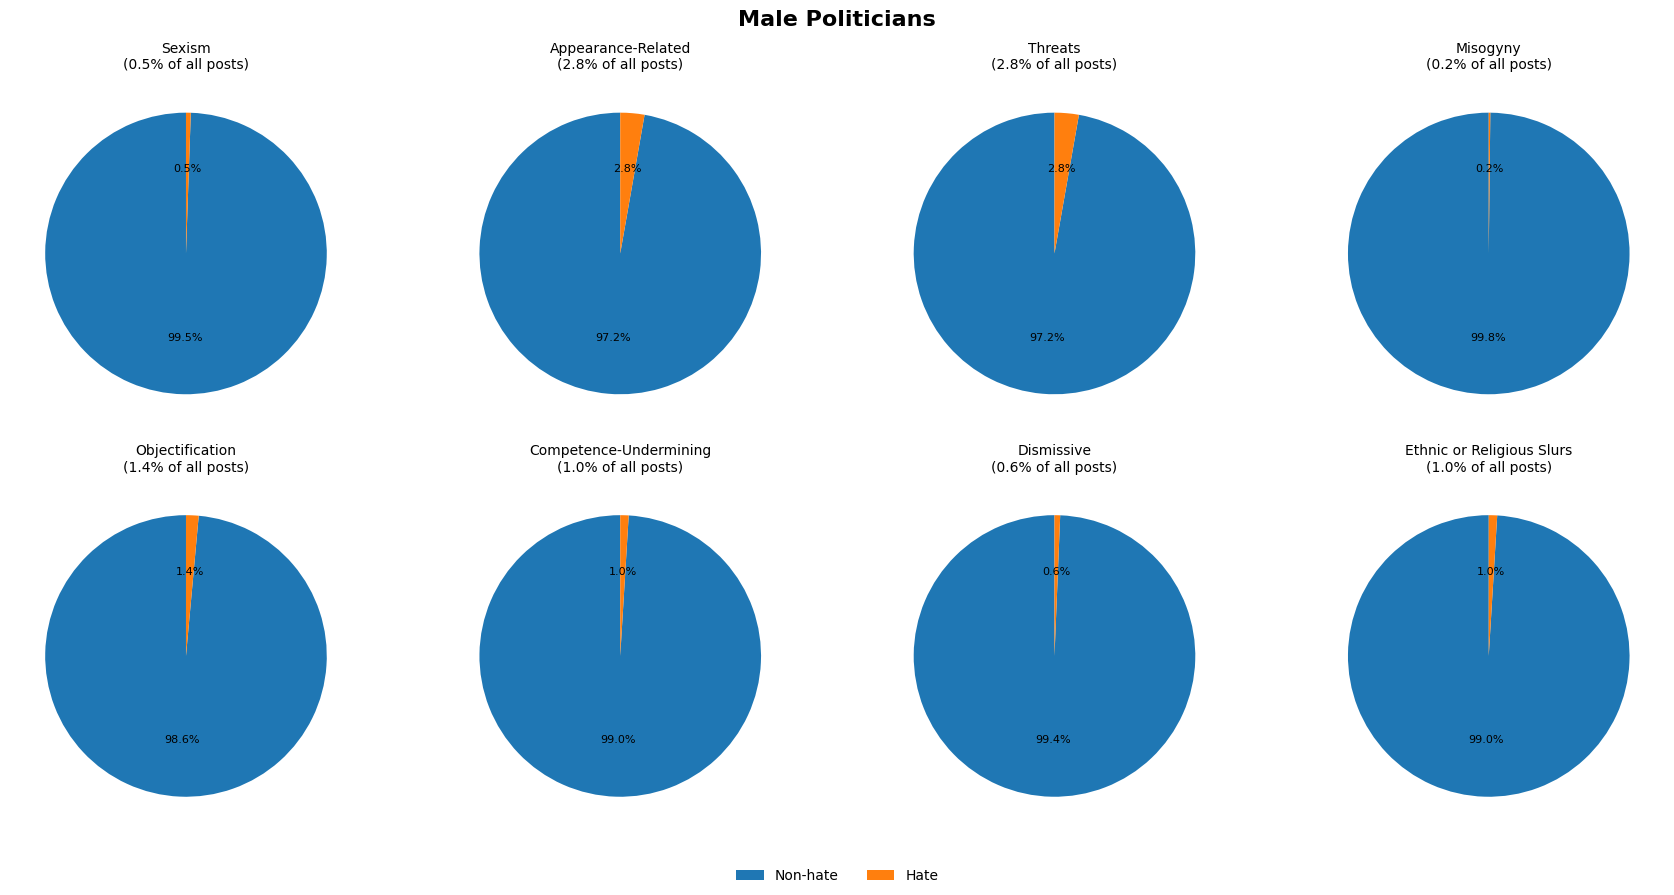

In [25]:

# Add global legend
fig.legend(
    labels=["Non-hate", "Hate"],
    loc="lower center",
    ncol=2,
    fontsize=10,
    frameon=False
)

category_counts = {
    category: len([p for p in malepol_posts if category in p.get('hate_categories', [])])
    for category in hate_keywords.keys()
}

total_posts = len(name_posts)

colors = ["#1f77b4", "#ff7f0e"]   # [non-hate, hate]

pretty_labels = {
    "sexist": "Sexism",
    "appearance": "Appearance-Related",
    "threats": "Threats",
    "misogyny": "Misogyny",
    "objectification": "Objectification",
    "competence_undermining": "Competence-Undermining",
    "dismissive": "Dismissive",
    "ethnic_religious_slurs": "Ethnic or Religious Slurs"
}

fig, axes = plt.subplots(2, 4, figsize=(18, 9))
fig.suptitle("Male Politicians", fontsize=16, fontweight="bold")
axes = axes.flatten()

for i, (category, count) in enumerate(category_counts.items()):
    ax = axes[i]

    hate_pct = (count / total_posts) * 100 if total_posts > 0 else 0
    sizes = [total_posts - count, count]

    ax.pie(
        sizes,
        colors=colors,
        autopct=lambda pct: f"{pct:.1f}%" if pct > 0 else "",
        startangle=90,
        textprops={'fontsize': 8}
    )

    ax.set_title(f"{pretty_labels[category]}\n({hate_pct:.1f}% of all posts)", fontsize=10)

plt.tight_layout()


fig.legend(
    labels=["Non-hate", "Hate"],
    loc="lower center",
    ncol=2,
    fontsize=10,
    frameon=False
)

plt.tight_layout(rect=[0, 0.05, 1, 1])  # leave space for legend
plt.show()



In [28]:
import numpy as np

In [29]:
blue = '#1f77b4'
orange = '#ff7f0e'

categories = list(hate_keywords.keys())

female_counts = {
    cat: len([p for p in name_posts if cat in p.get('hate_categories', [])])
    for cat in categories
}
female_total = len(name_posts)

male_counts = {
    cat: len([p for p in malepol_posts if cat in p.get('hate_categories', [])])
    for cat in categories
}
male_total = len(malepol_posts)

female_pct = {cat: female_counts[cat] / female_total * 100 for cat in categories}
male_pct   = {cat: male_counts[cat] / male_total   * 100 for cat in categories}

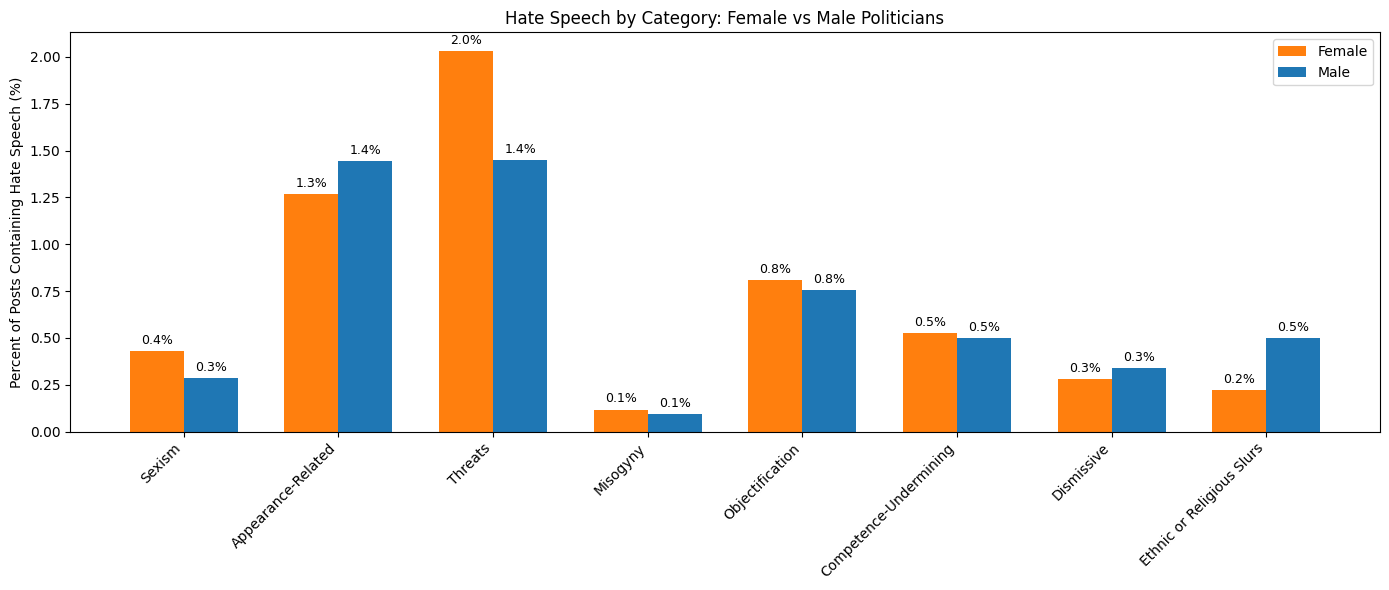

In [30]:
x = np.arange(len(categories))
width = 0.35

female_vals = [female_pct[c] for c in categories]
male_vals   = [male_pct[c] for c in categories]

fig, ax = plt.subplots(figsize=(14, 6))

bars_f = ax.bar(x - width/2, female_vals, width, label="Female", color=orange)
bars_m = ax.bar(x + width/2, male_vals, width, label="Male", color=blue)

ax.set_xticks(x)
ax.set_xticklabels([pretty_labels[c] for c in categories], rotation=45, ha='right')
ax.set_ylabel("Percent of Posts Containing Hate Speech (%)")
ax.set_title("Hate Speech by Category: Female vs Male Politicians")
ax.legend()

# --- Add Percentage Labels ---
for bar in bars_f:
    height = bar.get_height()
    ax.annotate(
        f'{height:.1f}%',
        xy=(bar.get_x() + bar.get_width()/2, height),
        xytext=(0, 3),
        textcoords="offset points",
        ha='center', va='bottom',
        fontsize=9
    )

for bar in bars_m:
    height = bar.get_height()
    ax.annotate(
        f'{height:.1f}%',
        xy=(bar.get_x() + bar.get_width()/2, height),
        xytext=(0, 3),
        textcoords="offset points",
        ha='center', va='bottom',
        fontsize=9
    )

plt.tight_layout()
plt.show()


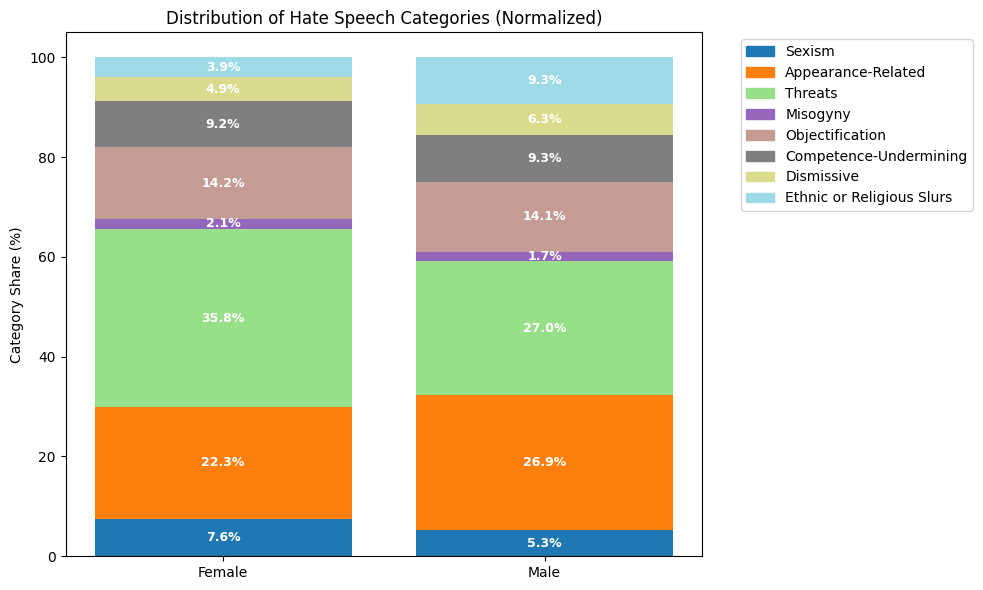

In [31]:
import matplotlib.pyplot as plt
import numpy as np

categories = list(hate_keywords.keys())

female_counts = {
    c: sum(c in p['hate_categories'] for p in name_posts)
    for c in categories
}
male_counts = {
    c: sum(c in p['hate_categories'] for p in malepol_posts)
    for c in categories
}

female_total = sum(female_counts.values())
male_total   = sum(male_counts.values())

female_pct = {c: (female_counts[c] / female_total * 100 if female_total else 0)
              for c in categories}
male_pct   = {c: (male_counts[c] / male_total * 100 if male_total else 0)
              for c in categories}

colors = plt.cm.tab20(np.linspace(0, 1, len(categories)))

fig, ax = plt.subplots(figsize=(10, 6))

bottom_f = 0
bottom_m = 0

for i, c in enumerate(categories):
    f_val = female_pct[c]
    m_val = male_pct[c]

    ax.bar("Female", f_val, bottom=bottom_f, color=colors[i])
    ax.bar("Male",   m_val, bottom=bottom_m, color=colors[i])

    if f_val > 1:
        ax.text(
            "Female",
            bottom_f + f_val / 2,
            f"{f_val:.1f}%",
            ha="center", va="center", fontsize=9, color="white", fontweight="bold"
        )
    if m_val > 1:
        ax.text(
            "Male",
            bottom_m + m_val / 2,
            f"{m_val:.1f}%",
            ha="center", va="center", fontsize=9, color="white", fontweight="bold"
        )

    bottom_f += f_val
    bottom_m += m_val

ax.set_ylabel("Category Share (%)")
ax.set_title("Distribution of Hate Speech Categories (Normalized)")

legend_patches = [
    plt.matplotlib.patches.Patch(color=colors[i], label=pretty_labels[c])
    for i, c in enumerate(categories)
]
ax.legend(handles=legend_patches, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

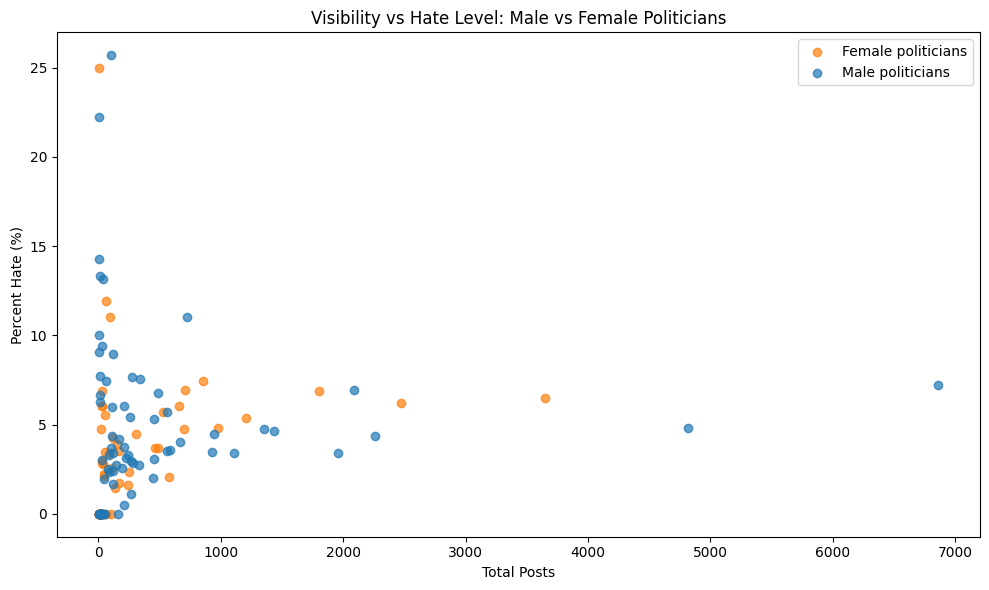

In [32]:
# Function to compute the hate rate of each politician
def compute_hate_rate(toots):
    poli_rates = {}
    for p in toots:
        pid = p["politician"]
        if pid not in poli_rates:
            poli_rates[pid] = {"total": 0, "hate": 0}
        poli_rates[pid]["total"] += 1
        if p["hate_speech"]:
            poli_rates[pid]["hate"] += 1

    return [
        (pid, data["total"], data["hate"] / data["total"] * 100)
        for pid, data in poli_rates.items()
        if data["total"] > 5  # filter tiny accounts
    ]

female_points = compute_hate_rate(name_posts)
male_points   = compute_hate_rate(malepol_posts)

fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(
    [p[1] for p in female_points],
    [p[2] for p in female_points],
    color=orange,
    label="Female politicians",
    alpha=0.7
)

ax.scatter(
    [p[1] for p in male_points],
    [p[2] for p in male_points],
    color=blue,
    label="Male politicians",
    alpha=0.7
)

ax.set_xlabel("Total Posts")
ax.set_ylabel("Percent Hate (%)")
ax.set_title("Visibility vs Hate Level: Male vs Female Politicians")
ax.legend()

plt.tight_layout()
plt.show()
